* Try to combine files from different processors

In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
import matplotlib.cm as cm
from matplotlib import animation
from numpy import *
from pylab import *
%matplotlib inline

In [2]:
## for grid_T
plume_33 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0033.nc')
plume_34 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0034.nc')
plume_35 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0035.nc')
plume_39 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0039.nc')
plume_40 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0040.nc')
plume_41 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0041.nc')
plume_45 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0045.nc')
plume_46 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0046.nc')
plume_47 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0047.nc')
plume_51 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0051.nc')
plume_52 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0052.nc')
plume_53 = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_T_0053.nc')

In [3]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

(260, 398, 350, 520)

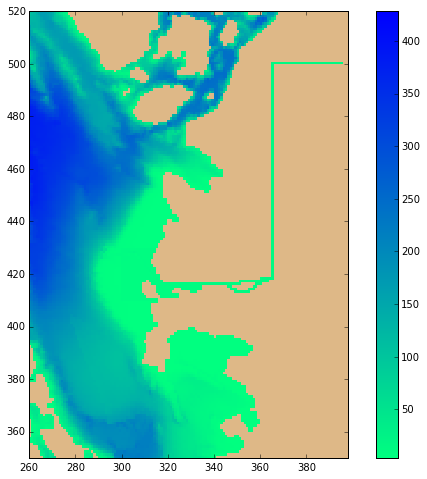

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
plt.axis((260, 398, 350, 520))

In [47]:
salinity[9,0,48,100]

0.0

* ncdump -tsc 1h_plume_T_0033.nc could help find the domain range of each tail(processor)!

In [5]:
nc_tools.show_variables(plume_33)

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'time_counter_bnds', u'sossheig', u'votemper', u'vosaline', u'rain_rate', u'snow_rate']


In [6]:
lon33= plume_33.variables['nav_lon']
lon33.shape

(36, 6)

# Create grid_T file

In [7]:
## for longitude 
lon33= plume_33.variables['nav_lon']
lon34= plume_34.variables['nav_lon']
lon35= plume_35.variables['nav_lon']
lon39= plume_39.variables['nav_lon']
lon40= plume_40.variables['nav_lon']
lon41= plume_41.variables['nav_lon']
lon45= plume_45.variables['nav_lon']
lon46= plume_46.variables['nav_lon']
lon47= plume_47.variables['nav_lon']
lon51= plume_51.variables['nav_lon']
lon52= plume_52.variables['nav_lon']
lon53= plume_53.variables['nav_lon']

In [8]:
## for latitude
lat33= plume_33.variables['nav_lat']
lat34= plume_34.variables['nav_lat']
lat35= plume_35.variables['nav_lat']
lat39= plume_39.variables['nav_lat']
lat40= plume_40.variables['nav_lat']
lat41= plume_41.variables['nav_lat']
lat45= plume_45.variables['nav_lat']
lat46= plume_46.variables['nav_lat']
lat47= plume_47.variables['nav_lat']
lat51= plume_51.variables['nav_lat']
lat52= plume_52.variables['nav_lat']
lat53= plume_53.variables['nav_lat']

In [9]:
## for ssh
ssh33 = plume_33.variables['sossheig']
ssh34 = plume_34.variables['sossheig']
ssh35 = plume_35.variables['sossheig']
ssh39 = plume_39.variables['sossheig']
ssh40 = plume_40.variables['sossheig']
ssh41 = plume_41.variables['sossheig']
ssh45 = plume_45.variables['sossheig']
ssh46 = plume_46.variables['sossheig']
ssh47 = plume_47.variables['sossheig']
ssh51 = plume_51.variables['sossheig']
ssh52 = plume_52.variables['sossheig']
ssh53 = plume_53.variables['sossheig']

In [10]:
## for temperature
temp33 = plume_33.variables['votemper']
temp34 = plume_34.variables['votemper']
temp35 = plume_35.variables['votemper']
temp39 = plume_39.variables['votemper']
temp40 = plume_40.variables['votemper']
temp41 = plume_41.variables['votemper']
temp45 = plume_45.variables['votemper']
temp46 = plume_46.variables['votemper']
temp47 = plume_47.variables['votemper']
temp51 = plume_51.variables['votemper']
temp52 = plume_52.variables['votemper']
temp53 = plume_53.variables['votemper']

In [11]:
saline33 = plume_33.variables['vosaline']
saline33.shape

(336, 40, 36, 6)

In [12]:
saline34 = plume_34.variables['vosaline']
saline34.shape

(336, 40, 36, 66)

In [13]:
saline35 = plume_35.variables['vosaline']
saline35.shape

(336, 40, 36, 66)

In [14]:
saline39 = plume_39.variables['vosaline']
saline39.shape

(336, 40, 64, 6)

In [15]:
saline40 = plume_40.variables['vosaline']
saline40.shape

(336, 40, 64, 66)

In [16]:
saline41 = plume_41.variables['vosaline']
saline41.shape

(336, 40, 64, 66)

In [17]:
saline45 = plume_45.variables['vosaline']
saline45.shape

(336, 40, 64, 6)

In [18]:
saline46 = plume_46.variables['vosaline']
saline46.shape

(336, 40, 64, 66)

In [19]:
saline47 = plume_47.variables['vosaline']
saline47.shape

(336, 40, 64, 66)

In [20]:
saline51 = plume_51.variables['vosaline']
saline51.shape

(336, 40, 6, 6)

In [21]:
saline52 = plume_52.variables['vosaline']
saline52.shape

(336, 40, 6, 66)

In [22]:
saline53 = plume_53.variables['vosaline']
saline53.shape

(336, 40, 6, 66)

In [23]:
## try to combine longitude and latitude in grid_T
lon = np.zeros([170, 138])
lat = np.zeros([170, 138])
## This is the edge for lon:
lon[0:36, 0:6] = lon33[:,:]
lon[36:100, 0:6] = lon39[:,:]
lon[100:164, 0:6] = lon45[:,:]
lon[164:170, 0:6] = lon51[:,:]
## This is the edge for lat:
lat[0:36, 0:6] = lat33[:,:]
lat[36:100, 0:6] = lat39[:,:]
lat[100:164, 0:6] = lat45[:,:]
lat[164:170, 0:6] = lat51[:,:]

In [24]:
## try to combine salinity & temperature & ssh in grid_T
salinity = np.zeros([336, 40, 170, 138])
temperature = np.zeros([336, 40, 170, 138])
ssh = np.zeros([336, 170, 138])
## This is the edge for salinity:
salinity[:,:, 0:36, 0:6] =saline33[:,:,:,:]
salinity[:,:, 36:100, 0:6] = saline39[:,:,:,:]
salinity[:,:, 100:164, 0:6 ] =saline45[:,:,:,:]
salinity[:,:, 164:170, 0:6] = saline51[:,:,:,:]
##for temperature:
temperature[:,:, 0:36, 0:6] =temp33[:,:,:,:]
temperature[:,:, 36:100, 0:6] = temp39[:,:,:,:]
temperature[:,:, 100:164, 0:6 ] =temp45[:,:,:,:]
temperature[:,:, 164:170, 0:6] = temp51[:,:,:,:]
## for ssh:
ssh[:, 0:36, 0:6] =ssh33[:,:,:]
ssh[:, 36:100, 0:6] = ssh39[:,:,:]
ssh[:, 100:164, 0:6 ] =ssh45[:,:,:]
ssh[:, 164:170, 0:6] = ssh51[:,:,:]

In [25]:
## salinity & lon & lat combination
for j in np.arange(36):
    for i in np.arange(66):
        salinity[:,:,j, 6+i] = saline34[:,:,j,i]
        lon[j, 6+i] = lon34[j,i]
        lat[j, 6+i] = lat34[j,i]
    print (j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [26]:
for j in np.arange(36):
    for i in np.arange(66):
        salinity[:,:,j,72+i] = saline35[:,:,j,i]
        lon[j, 72+i] = lon35[j,i]
        lat[j, 72+i] = lat35[j,i]
    print (j)  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [27]:
for j in np.arange(64):
    for i in np.arange(66):
        salinity[:,:, 36+j, 6+i] = saline40[:,:,j,i]
        lon[36+j, 6+i] = lon40[j,i]
        lat[36+j, 6+i] = lat40[j,i]
    print (j)  
    
for j in np.arange(64):
    for i in np.arange(66):
        salinity[:,:, 36+j, 72+i] = saline41[:,:,j,i]
        lon[36+j, 72+i] = lon41[j,i]
        lat[36+j, 72+i] = lat41[j,i]
    print (j)  
    
for j in np.arange(64):
    for i in np.arange(66):
        salinity[:,:,100 +j, 6+i] = saline46[:,:,j,i]
        lon[100+j, 6+i] = lon46[j,i]
        lat[100+j, 6+i] = lat46[j,i]
    print (j)  
    
for j in np.arange(64):
    for i in np.arange(66):
        salinity[:,:,100 +j, 72+i] = saline47[:,:,j,i]
        lon[100+j, 72+i] = lon47[j,i]
        lat[100+j, 72+i] = lat47[j,i]
    print (j) 
    
for j in np.arange(6):
    for i in np.arange(66):
        salinity[:,:,164 +j, 6+i] = saline52[:,:,j,i]
        lon[164+j, 6+i] = lon52[j,i]
        lat[164+j, 6+i] = lat52[j,i]
    print (j)  
    
for j in np.arange(6):
    for i in np.arange(66):
        salinity[:,:,164 +j, 72+i] = saline53[:,:,j,i]
        lon[164+j, 72+i] = lon53[j,i]
        lat[164+j, 72+i] = lat53[j,i]
    print (j) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
0
1
2
3
4
5


In [ ]:
## salinity & lon & lat combination
for j in np.arange(36):
    for i in np.arange(66):
        salinity[:,:,j, 6+i] = saline34[:,:,j,i]
        lon[j, 6+i] = lon34[j,i]
        lat[j, 6+i] = lat34[j,i]
    print (j)   
        
for j in np.arange(36):
    for i in np.arange(66):
        salinity[:,:,j,72+i] = saline35[:,:,j,i]
        lon[j, 72+i] = lon35[j,i]
        lat[j, 72+i] = lat35[j,i]
    print (j)   
    
for j in np.arange(64):
    for i in np.arange(66):
        salinity[:,:, 36+j, 6+i] = saline40[:,:,j,i]
        lon[36+j, 6+i] = lon40[j,i]
        lat[36+j, 6+i] = lat40[j,i]
    print (j)  
    
for j in np.arange(64):
    for i in np.arange(66):
        salinity[:,:, 36+j, 72+i] = saline41[:,:,j,i]
        lon[36+j, 72+i] = lon41[j,i]
        lat[36+j, 72+i] = lat41[j,i]
    print (j)  
    
for j in np.arange(64):
    for i in np.arange(66):
        salinity[:,:,100 +j, 6+i] = saline46[:,:,j,i]
        lon[100+j, 6+i] = lon46[j,i]
        lat[100+j, 6+i] = lat46[j,i]
    print (j)  
    
for j in np.arange(64):
    for i in np.arange(66):
        salinity[:,:,100 +j, 72+i] = saline47[:,:,j,i]
        lon[100+j, 72+i] = lon47[j,i]
        lat[100+j, 72+i] = lat47[j,i]
    print (j) 
    
for j in np.arange(6):
    for i in np.arange(66):
        salinity[:,:,164 +j, 6+i] = saline52[:,:,j,i]
        lon[164+j, 6+i] = lon52[j,i]
        lat[164+j, 6+i] = lat52[j,i]
    print (j)  
    
for j in np.arange(6):
    for i in np.arange(66):
        salinity[:,:,164 +j, 72+i] = saline53[:,:,j,i]
        lon[164+j, 72+i] = lon53[j,i]
        lat[164+j, 72+i] = lat53[j,i]
    print (j) 

<matplotlib.colorbar.Colorbar instance at 0x7f5321c33638>

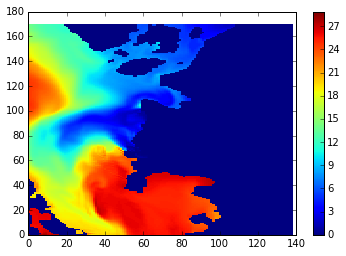

In [44]:
plt.pcolormesh(salinity[9,0,:,:])
plt.colorbar()

In [48]:
## temperature combination
for j in np.arange(36):
    for i in np.arange(66):
        temperature[:,:,j, 6+i] = temp34[:,:,j,i]
    print (j)
        
for j in np.arange(36):
    for i in np.arange(66):
        temperature[:,:,j,72+i] = temp35[:,:,j,i]
    print (j)
    
for j in np.arange(64):
    for i in np.arange(66):
        temperature[:,:, 36+j, 6+i] = temp40[:,:,j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        temperature[:,:, 36+j, 72+i] = temp41[:,:,j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        temperature[:,:,100 +j, 6+i] = temp46[:,:,j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        temperature[:,:,100 +j, 72+i] = temp47[:,:,j,i]
    print (j)
    
for j in np.arange(6):
    for i in np.arange(66):
        temperature[:,:,164 +j, 6+i] = temp52[:,:,j,i]
    print (j) 
    
for j in np.arange(6):
    for i in np.arange(66):
        temperature[:,:,164 +j, 72+i] = temp53[:,:,j,i]
    print (j)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
0
1
2
3
4
5


In [ ]:
## ssh combination
for j in np.arange(36):
    for i in np.arange(66):
        ssh[:,j, 6+i] = ssh34[:,j,i]
        
for j in np.arange(36):
    for i in np.arange(66):
        ssh[:,j,72+i] = ssh35[:,j,i]
        
for j in np.arange(64):
    for i in np.arange(66):
        ssh[:, 36+j, 6+i] = ssh40[:,j,i]
        
for j in np.arange(64):
    for i in np.arange(66):
        ssh[:, 36+j, 72+i] = ssh41[:,j,i]
        
for j in np.arange(64):
    for i in np.arange(66):
        ssh[:,100 +j, 6+i] = ssh46[:,j,i]
        
for j in np.arange(64):
    for i in np.arange(66):
        ssh[:,100 +j, 72+i] = ssh47[:,j,i]
        
for j in np.arange(6):
    for i in np.arange(66):
        ssh[:,164 +j, 6+i] = ssh52[:,j,i]
        
for j in np.arange(6):
    for i in np.arange(66):
        ssh[:,164 +j, 72+i] = ssh53[:,j,i]

In [ ]:
# build grid_T nc file
grid_T = nc.Dataset('1h_plume_06160629_grid_T.nc', 'w')
nc_tools.init_dataset_attrs(
    grid_T, 
    title='Salinity Temperature Initial Conditions based on Nowcast June 14, 2015 for extended Fraser river channel', 
    notebook_name='Smooth bathymetry & Create New TS file', 
    nc_filepath='/data/jieliu/MEOPAR/rirver-treatment/14nor_NW/1h_plume_06160629_grid_T.nc',
    comment='Salinity and Temperature conditions from nowcast June 14, 2015 onto extended Fraser bathymetry')
grid_T.createDimension('y', 170)
grid_T.createDimension('x', 138)
grid_T.createDimension('deptht',size = len(depths))
grid_T.createDimension('time_counter', None)
nc_tools.show_dimensions(grid_T)
# show variables
nav_lat = grid_T.createVariable('nav_lat', 'float32', ('y','x'))
nav_lat.long_name = 'Latitude'
nav_lat.units = 'degrees_north'
nav_lat = lat
nav_lon = grid_T.createVariable('nav_lon', 'float32', ('y','x'))
nav_lon.long_name = 'Longitude'
nav_lon.units = 'degrees_east'
nav_lon = lon
deptht = grid_T.createVariable('deptht', 'float32', ('deptht'))
deptht.long_name = 'Depth'
deptht.units = 'm'
deptht.positive = 'down'
deptht.valid_range = np.array((4., 428.))##minimum depth 4m
deptht = depths
time_counter = grid_T.createVariable('time_counter', 'float32', ('time_counter'))
time_counter.units = 'seconds since 2015-06-16 0:00:00'
time_counter.long_name = 'Time axis'
vosaline = grid_T.createVariable('vosaline', 'float32', 
                               ('time_counter','deptht','y','x'))
vosaline.units = 'none'
vosaline.long_name = 'Practical Salinity'  
vosaline.coordinates = 'nav_lon nav_lat deptht time_counter'
vosaline.grid = 'SalishSea6, extended and deepen Fraser'
vosaline[0] = salinity
votemper = grid_T.createVariable('votemper', 'float32', 
                               ('time_counter','deptht','y','x'))
votemper.units = 'degC'
votemper.long_name = 'Temperature' 
votemper.coordinates = 'nav_lon nav_lat deptht time_counter'
votemper[0] = temperature

sossheig = grid_T.createVariable('sossheig', 'float32', 
                               ('time_counter','y','x'))
sossheig.units = 'm'
sossheig.long_name = 'sea surface height' 
sossheig.coordinates = 'time_counter nav_lon nav_lat '
sossheig[0] = ssh
new_TS.history = """[2015-06-16] Created"""

In [33]:
ssh33.shape

(336, 36, 6)

# Create grid_U file

# Create grid_V file